BÀI LÀM THỰC HÀNH NHÓM 31

Thành viên:

In [12]:
import warnings
warnings.filterwarnings('ignore')

### Yêu cầu 1: Cho xích Markov có ma trận chuyển [[0.8  0.2] [0.1  0.9]]. Hãy viết chương trình python tìm phân phối dừng của Xích Markov. Hãy cho biết sau bao lâu thì xích Markov này đạt phân phối dừng.

#### Cách 1: sử dụng phương pháp đại số tuyến tính

In [1]:
import numpy as np

# Ma trận chuyển
P = np.array([[0.8, 0.2], 
              [0.1, 0.9]])

# Tìm phân phối dừng bằng cách giải phương trình πP = π
# Đồng thời π.sum() = 1
def stationary_distribution(P):
    n = P.shape[0]
    A = np.append(P.T - np.eye(n), [np.ones(n)], axis=0)  # Ma trận mở rộng
    b = np.append(np.zeros(n), [1])                      # Điều kiện tổng bằng 1
    pi = np.linalg.lstsq(A, b, rcond=None)[0]            # Giải phương trình
    return pi

# Tính khoảng cách giữa các bước để xác định thời gian hội tụ
def convergence_time(P, tolerance=1e-6):
    n = P.shape[0]
    pi = stationary_distribution(P)
    dist = np.ones(n) / n  # Phân phối ban đầu (đồng đều)
    iterations = 0
    while np.linalg.norm(dist - pi, ord=1) > tolerance:
        dist = dist @ P
        iterations += 1
    return iterations, dist

# Phân phối dừng
pi = stationary_distribution(P)
print("Phân phối dừng:", pi)

# Thời gian hội tụ
iterations, final_dist = convergence_time(P)
print(f"Sau {iterations} bước, xích Markov hội tụ đến phân phối dừng.")
print("Phân phối tại bước cuối:", final_dist)


Phân phối dừng: [0.33333333 0.66666667]
Sau 36 bước, xích Markov hội tụ đến phân phối dừng.
Phân phối tại bước cuối: [0.33333378 0.66666622]


### Yêu cầu 2: 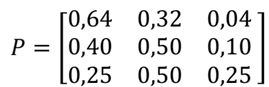

In [2]:
import numpy as np

def find_stationary_distribution(P, max_iter=1000, tol=1e-6):
    """
    Tìm phân phối dừng của xích Markov.
    
    Parameters:
    - P: Ma trận xác suất chuyển.
    - max_iter: Số lần lặp tối đa.
    - tol: Ngưỡng sai số để kiểm tra hội tụ.

    Returns:
    - pi: Phân phối dừng.
    - n_steps: Số bước cần để hội tụ.
    """
    # Giải hệ phương trình πP = π với điều kiện sum(π) = 1
    n = P.shape[0]
    A = np.vstack([P.T - np.eye(n), np.ones(n)])
    b = np.array([0] * n + [1])
    pi = np.linalg.lstsq(A, b, rcond=None)[0]  # Phân phối dừng
    
    # Kiểm tra thời gian hội tụ
    pi_current = np.zeros(n)  # Phân phối khởi tạo
    pi_current[0] = 1  # Giả sử bắt đầu từ trạng thái 1
    for n_steps in range(1, max_iter + 1):
        pi_next = np.dot(pi_current, P)
        if np.linalg.norm(pi_next - pi_current) < tol:
            return pi, n_steps  # Hội tụ
        pi_current = pi_next
    return pi, None  # Không hội tụ trong max_iter bước

# Ma trận xác suất chuyển
P = np.array([
    [0.64, 0.32, 0.04],
    [0.40, 0.50, 0.10],
    [0.25, 0.50, 0.25]
])

# Tính toán
stationary_distribution, steps = find_stationary_distribution(P)

print("Phân phối dừng:", stationary_distribution)
if steps:
    print(f"Xích Markov hội tụ sau {steps} bước.")
else:
    print("Xích Markov không hội tụ trong số bước lặp tối đa.")


Phân phối dừng: [0.51020408 0.40816327 0.08163265]
Xích Markov hội tụ sau 12 bước.


### Yêu cầu 3:

In [3]:
import numpy as np
import random
from collections import Counter

def custom_random():
    """
    Sinh số ngẫu nhiên từ 1, 2, 3, 4 với xác suất tương ứng:
    0.1, 0.4, 0.3, 0.2
    """
    # Ranh giới xác suất tích lũy
    thresholds = [0.1, 0.5, 0.8, 1.0]
    rand = np.random.rand()  # Sinh số ngẫu nhiên từ [0, 1)
    if rand < thresholds[0]:
        return 1
    elif rand < thresholds[1]:
        return 2
    elif rand < thresholds[2]:
        return 3
    else:
        return 4

def monte_carlo_simulation(n_samples):
    """
    Chạy thử nghiệm Monte Carlo với n_samples để kiểm tra phân phối.
    """
    results = [custom_random() for _ in range(n_samples)]
    counts = Counter(results)
    probabilities = {key: value / n_samples for key, value in counts.items()}
    return probabilities

def random_choices_simulation(n_samples):
    """
    Sử dụng random.choices để sinh số và kiểm tra phân phối.
    """
    population = [1, 2, 3, 4]
    weights = [0.1, 0.4, 0.3, 0.2]
    results = [random.choices(population, weights)[0] for _ in range(n_samples)]
    counts = Counter(results)
    probabilities = {key: value / n_samples for key, value in counts.items()}
    return probabilities

# Số lần thử nghiệm Monte Carlo
n_samples = 100000

# Chạy Monte Carlo với phương pháp custom
custom_probabilities = monte_carlo_simulation(n_samples)
print("Xác suất (Monte Carlo - custom method):", custom_probabilities)

# Chạy Monte Carlo với phương pháp random.choices
choices_probabilities = random_choices_simulation(n_samples)
print("Xác suất (Monte Carlo - random.choices):", choices_probabilities)


Xác suất (Monte Carlo - custom method): {2: 0.40216, 3: 0.29957, 1: 0.09986, 4: 0.19841}
Xác suất (Monte Carlo - random.choices): {2: 0.39985, 4: 0.20025, 3: 0.2985, 1: 0.1014}


### Yêu cầu 4: 

In [4]:
import numpy as np

def estimate_pi(num_samples):
    """
    Mô phỏng Monte Carlo để ước lượng số Pi.
    
    Parameters:
    - num_samples: Số điểm ngẫu nhiên được sinh ra.
    
    Returns:
    - pi_estimate: Giá trị xấp xỉ của số Pi.
    """
    # Sinh ngẫu nhiên các điểm (x, y) trong hình vuông [-1, 1] x [-1, 1]
    x = np.random.uniform(-1, 1, num_samples)
    y = np.random.uniform(-1, 1, num_samples)
    
    # Tính khoảng cách từ các điểm đến gốc tọa độ (0, 0)
    distances = np.sqrt(x**2 + y**2)
    
    # Đếm số điểm nằm trong hình tròn (khoảng cách <= 1)
    points_inside_circle = np.sum(distances <= 1)
    
    # Ước lượng Pi
    pi_estimate = 4 * points_inside_circle / num_samples
    return pi_estimate

# Số lần mô phỏng
num_samples = 1000000
pi_approx = estimate_pi(num_samples)

print(f"Ước lượng số Pi với {num_samples} điểm ngẫu nhiên: {pi_approx}")


Ước lượng số Pi với 1000000 điểm ngẫu nhiên: 3.141388


### Yêu cầu 5: 

In [5]:
import numpy as np
from scipy.integrate import quad

# Tính diện tích bằng Monte Carlo
def monte_carlo_area(num_samples):
    """
    Tính diện tích miền giới hạn giữa y = sqrt(x) và y = x bằng phương pháp Monte Carlo.
    
    Parameters:
    - num_samples: Số điểm ngẫu nhiên được sinh ra.
    
    Returns:
    - estimated_area: Diện tích ước lượng.
    """
    x = np.random.uniform(0, 1, num_samples)
    y = np.random.uniform(0, 1, num_samples)
    
    # Đếm số điểm nằm giữa hai đường
    points_between_curves = np.sum((y <= np.sqrt(x)) & (y >= x))
    
    # Diện tích miền = tỷ lệ * diện tích hình chữ nhật (ở đây là 1)
    estimated_area = points_between_curves / num_samples
    return estimated_area

# Tính diện tích bằng giải tích
def analytical_area():
    """
    Tính diện tích miền giới hạn giữa y = sqrt(x) và y = x bằng tích phân.
    
    Returns:
    - exact_area: Diện tích chính xác.
    """
    result, _ = quad(lambda x: np.sqrt(x) - x, 0, 1)
    return result

# Số lần thử nghiệm Monte Carlo
num_samples = 1000000

# Tính diện tích
monte_carlo_result = monte_carlo_area(num_samples)
analytical_result = analytical_area()

print(f"Diện tích gần đúng (Monte Carlo, {num_samples} điểm): {monte_carlo_result:.6f}")
print(f"Diện tích chính xác (Giải tích): {analytical_result:.6f}")


Diện tích gần đúng (Monte Carlo, 1000000 điểm): 0.166900
Diện tích chính xác (Giải tích): 0.166667


### Yêu cầu 6: 

In [6]:
import numpy as np
from scipy.integrate import dblquad

def monte_carlo_integral_a(num_samples):
    """
    Tích phân hai lớp trên miền hình tròn D: x^2 + y^2 <= 1
    """
    # Sinh điểm ngẫu nhiên trong hình vuông [-1, 1] x [-1, 1]
    x = np.random.uniform(-1, 1, num_samples)
    y = np.random.uniform(-1, 1, num_samples)
    
    # Chỉ giữ các điểm trong hình tròn
    inside_circle = x**2 + y**2 <= 1
    x, y = x[inside_circle], y[inside_circle]
    
    # Hàm z = x^2 + y^2
    z = x**2 + y**2
    
    # Tích phân gần đúng
    circle_area = np.pi  # Diện tích hình tròn
    estimated_integral = circle_area * np.mean(z)
    return estimated_integral

def monte_carlo_integral_b(num_samples):
    """
    Tích phân hai lớp trên miền hình vuông D = [0, 1] x [0, 1]
    """
    # Sinh điểm ngẫu nhiên trong miền [0, 1] x [0, 1]
    x = np.random.uniform(0, 1, num_samples)
    y = np.random.uniform(0, 1, num_samples)
    
    # Hàm z = x^2 + y^2
    z = x**2 + y**2
    
    # Tích phân gần đúng
    estimated_integral = np.mean(z)  # Diện tích hình vuông là 1
    return estimated_integral

def analytical_integral_a():
    """
    Tính tích phân trên miền hình tròn bằng giải tích.
    """
    integral = dblquad(lambda y, x: x**2 + y**2, -1, 1, 
                       lambda x: -np.sqrt(1 - x**2), lambda x: np.sqrt(1 - x**2))[0]
    return integral

def analytical_integral_b():
    """
    Tính tích phân trên miền hình vuông bằng giải tích.
    """
    integral = dblquad(lambda y, x: x**2 + y**2, 0, 1, 0, 1)[0]
    return integral

# Số điểm Monte Carlo
num_samples = 1000000

# Kết quả Monte Carlo
result_a_mc = monte_carlo_integral_a(num_samples)
result_b_mc = monte_carlo_integral_b(num_samples)

# Kết quả giải tích
result_a_analytical = analytical_integral_a()
result_b_analytical = analytical_integral_b()

# Hiển thị kết quả
print(f"Tích phân trên miền hình tròn (Monte Carlo): {result_a_mc:.6f}")
print(f"Tích phân trên miền hình tròn (Giải tích): {result_a_analytical:.6f}")

print(f"Tích phân trên miền hình vuông (Monte Carlo): {result_b_mc:.6f}")
print(f"Tích phân trên miền hình vuông (Giải tích): {result_b_analytical:.6f}")


Tích phân trên miền hình tròn (Monte Carlo): 1.572646
Tích phân trên miền hình tròn (Giải tích): 1.570796
Tích phân trên miền hình vuông (Monte Carlo): 0.666590
Tích phân trên miền hình vuông (Giải tích): 0.666667


### Yêu cầu 7: 

In [7]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad

# Hàm tính gần đúng hàm Laplace bằng Monte Carlo
def laplace_mc(x, num_samples=1000000):
    """
    Tính gần đúng hàm Laplace \Phi(x) = (1/sqrt(2*pi)) * \int_{-\infty}^x exp(-t^2/2) dt
    bằng phương pháp Monte Carlo.
    
    Parameters:
    - x: Giá trị đầu vào.
    - num_samples: Số mẫu ngẫu nhiên.
    
    Returns:
    - Phi(x): Giá trị gần đúng của hàm Laplace.
    """
    # Sinh ngẫu nhiên các giá trị trong khoảng [-5, x]
    samples = np.random.uniform(-5, x, num_samples)
    
    # Hàm f(t) = exp(-t^2 / 2) / sqrt(2*pi)
    fx = np.exp(-samples**2 / 2) / np.sqrt(2 * np.pi)
    
    # Tích phân Monte Carlo
    estimated_area = (x - (-5)) * np.mean(fx)
    return estimated_area

# Hàm tính gần đúng hàm Laplace bằng tích phân số
def laplace_numerical(x):
    """
    Tính gần đúng hàm Laplace \Phi(x) bằng phương pháp tích phân số.
    """
    result, _ = quad(lambda t: np.exp(-t**2 / 2) / np.sqrt(2 * np.pi), -np.inf, x)
    return result

# So sánh với thư viện scipy.stats
def compare_laplace(x):
    """
    So sánh kết quả tính gần đúng của hàm Laplace với giá trị từ scipy.stats.
    """
    # Kết quả Monte Carlo
    mc_result = laplace_mc(x)
    
    # Kết quả tích phân số
    numerical_result = laplace_numerical(x)
    
    # Kết quả từ scipy.stats
    scipy_result = norm.cdf(x)
    
    print(f"x = {x}")
    print(f"Monte Carlo ước lượng: {mc_result:.6f}")
    print(f"Tích phân số (SciPy quad): {numerical_result:.6f}")
    print(f"Thư viện scipy.stats: {scipy_result:.6f}")
    print()

# Chạy thử nghiệm với các giá trị khác nhau
x_values = [-1, 0, 1, 2]
for x in x_values:
    compare_laplace(x)


<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:30: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:30: SyntaxWarning: invalid escape sequence '\P'
C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22928\3364573248.py:7: SyntaxWarning: invalid escape sequence '\P'
  """
C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22928\3364573248.py:30: SyntaxWarning: invalid escape sequence '\P'
  """


x = -1
Monte Carlo ước lượng: 0.158777
Tích phân số (SciPy quad): 0.158655
Thư viện scipy.stats: 0.158655

x = 0
Monte Carlo ước lượng: 0.499743
Tích phân số (SciPy quad): 0.500000
Thư viện scipy.stats: 0.500000

x = 1
Monte Carlo ước lượng: 0.841855
Tích phân số (SciPy quad): 0.841345
Thư viện scipy.stats: 0.841345

x = 2
Monte Carlo ước lượng: 0.976835
Tích phân số (SciPy quad): 0.977250
Thư viện scipy.stats: 0.977250



### Yêu cầu 8: 

In [8]:
import numpy as np

def simulate_game(num_games):
    """
    Mô phỏng trò chơi cá cược.
    
    Parameters:
    - num_games: Số lần chơi trò chơi.
    
    Returns:
    - total_profit: Số tiền người chơi A thu về sau num_games lần.
    """
    # Sinh kết quả ngẫu nhiên từ 1 đến 100
    results = np.random.randint(1, 101, num_games)
    
    # Người chơi thắng nếu kết quả >= 52
    # Nhà cái thắng nếu kết quả <= 51
    wins = results >= 52
    losses = results <= 51
    
    # Tính tổng lợi nhuận (1 USD nếu thắng, -1 USD nếu thua)
    total_profit = np.sum(wins) - np.sum(losses)
    return total_profit

def theoretical_expectation(num_games):
    """
    Tính kết quả kỳ vọng theo lý thuyết xác suất.
    """
    return num_games * (-1 / 50)

# Số lần chơi: 10, 100, 1000
num_games_list = [10, 100, 1000]

print("Kết quả mô phỏng và so sánh với lý thuyết:")
for num_games in num_games_list:
    simulated_result = simulate_game(num_games)
    theoretical_result = theoretical_expectation(num_games)
    
    print(f"Số lần chơi: {num_games}")
    print(f"  - Kết quả mô phỏng: {simulated_result} USD")
    print(f"  - Kết quả kỳ vọng lý thuyết: {theoretical_result:.2f} USD")
    print(f"  - Sai lệch: {simulated_result - theoretical_result:.2f} USD\n")


Kết quả mô phỏng và so sánh với lý thuyết:
Số lần chơi: 10
  - Kết quả mô phỏng: -2 USD
  - Kết quả kỳ vọng lý thuyết: -0.20 USD
  - Sai lệch: -1.80 USD

Số lần chơi: 100
  - Kết quả mô phỏng: 0 USD
  - Kết quả kỳ vọng lý thuyết: -2.00 USD
  - Sai lệch: 2.00 USD

Số lần chơi: 1000
  - Kết quả mô phỏng: -4 USD
  - Kết quả kỳ vọng lý thuyết: -20.00 USD
  - Sai lệch: 16.00 USD



Mở rộng sang trò chơi bầu cua:
Giả sử một người đặt a đồng vào ô “cua” (một trong 6 ô có tên là: Bầu, cua, cá, tôm, gà, chó). Nhà cái sẽ tung 3 hạt  bầu cua. Nếu được i (i>0) mặt “cua” thì người chơi sẽ được thưởng i lần a đồng, còn nếu không được mặt “cua” nào thì người chơi bị mất a đồng đã đặt. Dùng mô phỏng Monte-Carlo để đánh giá tính công bằng của trò chơi này.

In [9]:
import numpy as np

def simulate_bau_cua(num_games, bet_amount):
    """
    Mô phỏng trò chơi Bầu Cua và tính toán tổng lợi nhuận của người chơi.
    
    Parameters:
    - num_games: Số lần chơi trò chơi.
    - bet_amount: Số tiền đặt cược vào ô "cua".
    
    Returns:
    - total_profit: Tổng lợi nhuận của người chơi sau num_games lần.
    """
    # Kết quả lợi nhuận của người chơi
    total_profit = 0
    
    for _ in range(num_games):
        # Tung 3 hạt Bầu Cua
        rolls = np.random.choice(['bầu', 'cua', 'cá', 'tôm', 'gà', 'chó'], size=3)
        
        # Đếm số lần "cua" xuất hiện
        count_cua = np.sum(rolls == 'cua')
        
        # Tính lợi nhuận: i * bet_amount nếu có "cua", -bet_amount nếu không
        if count_cua > 0:
            total_profit += count_cua * bet_amount
        else:
            total_profit -= bet_amount
    
    return total_profit

def theoretical_expectation(bet_amount):
    """
    Tính kỳ vọng lý thuyết của trò chơi.
    """
    probabilities = [ (5/6)**3, 3 * (1/6) * (5/6)**2, 3 * (1/6)**2 * (5/6), (1/6)**3 ]
    rewards = [-1, 1, 2, 3]
    
    expectation = sum(p * r for p, r in zip(probabilities, rewards)) * bet_amount
    return expectation

# Thử nghiệm mô phỏng
num_games = 100000  # Số lần chơi
bet_amount = 1  # Đặt cược 1 đồng mỗi lần

# Mô phỏng trò chơi
simulated_profit = simulate_bau_cua(num_games, bet_amount)
simulated_expectation = simulated_profit / num_games

# Tính kỳ vọng lý thuyết
theoretical_exp = theoretical_expectation(bet_amount)

# Kết quả
print(f"Số lần chơi: {num_games}")
print(f"Kỳ vọng theo mô phỏng Monte Carlo: {simulated_expectation:.4f} đồng")
print(f"Kỳ vọng lý thuyết: {theoretical_exp:.4f} đồng")


Số lần chơi: 100000
Kỳ vọng theo mô phỏng Monte Carlo: -0.0809 đồng
Kỳ vọng lý thuyết: -0.0787 đồng


### Yêu cầu 9: 

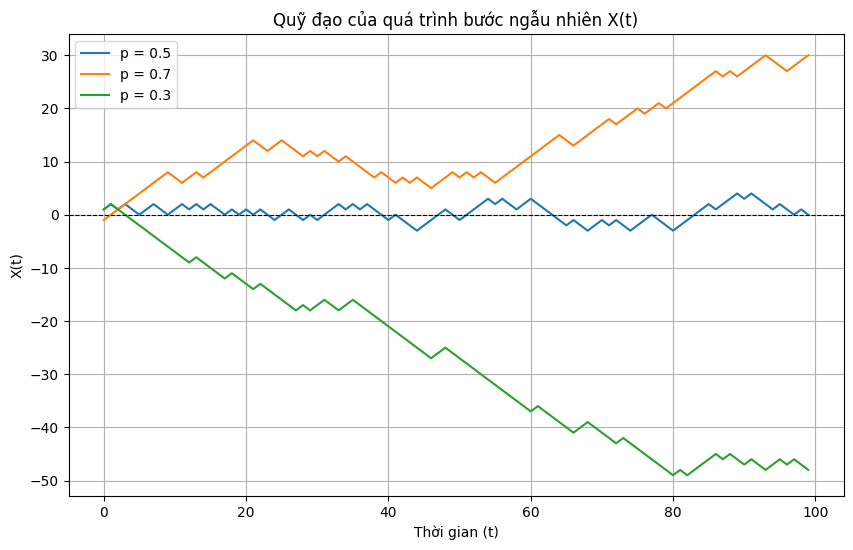

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(timesteps, p=0.5):
    """
    Mô phỏng bước ngẫu nhiên X(t).
    
    Parameters:
    - timesteps: Số bước trong quá trình.
    - p: Xác suất để \(Y_i = 1\).
    
    Returns:
    - trajectory: Danh sách vị trí \(X(t)\) tại từng thời điểm \(t\).
    """
    # Sinh các giá trị \(Y_i\) với xác suất \(p\) cho +1 và \(1-p\) cho -1
    steps = np.random.choice([1, -1], size=timesteps, p=[p, 1-p])
    # Tính \(X(t) = \sum_{i=0}^{t} Y_i\)
    trajectory = np.cumsum(steps)
    return trajectory

# Số bước
timesteps = 100

# Mô phỏng 3 quỹ đạo
trajectory1 = random_walk(timesteps, p=0.5)  # Trường hợp xác suất 1/2
trajectory2 = random_walk(timesteps, p=0.7)  # Trường hợp p = 0.7
trajectory3 = random_walk(timesteps, p=0.3)  # Trường hợp p = 0.3

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(range(timesteps), trajectory1, label="p = 0.5")
plt.plot(range(timesteps), trajectory2, label="p = 0.7")
plt.plot(range(timesteps), trajectory3, label="p = 0.3")

# Định dạng đồ thị
plt.title("Quỹ đạo của quá trình bước ngẫu nhiên X(t)")
plt.xlabel("Thời gian (t)")
plt.ylabel("X(t)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Đường x = 0
plt.legend()
plt.grid()
plt.show()


### Yêu cầu 10: 

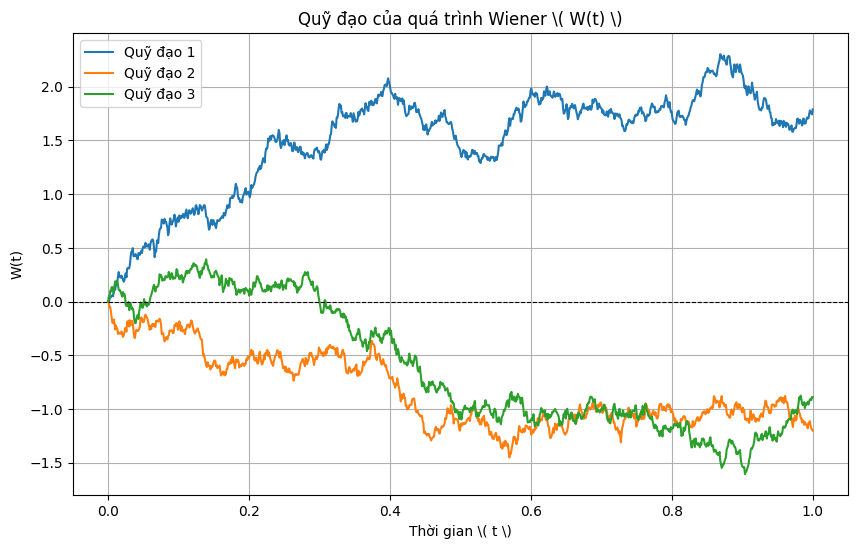

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener(timesteps, T, num_paths=3):
    """
    Mô phỏng quỹ đạo của quá trình Wiener W(t).
    
    Parameters:
    - timesteps: Số bước thời gian (chia nhỏ khoảng [0, T]).
    - T: Thời gian tổng cộng của quá trình.
    - num_paths: Số quỹ đạo cần mô phỏng.
    
    Returns:
    - paths: Danh sách các quỹ đạo \( W(t) \).
    - time: Danh sách các thời điểm \( t \).
    """
    dt = T / timesteps  # Bước thời gian
    time = np.linspace(0, T, timesteps)  # Các thời điểm từ 0 đến T
    
    # Mô phỏng các quỹ đạo
    paths = []
    for _ in range(num_paths):
        # Tạo các nhiễu ngẫu nhiên N(0, dt) cho các bước
        increments = np.random.normal(0, np.sqrt(dt), size=timesteps - 1)
        # W(0) = 0, tính quỹ đạo bằng cách cộng dồn các nhiễu
        path = np.concatenate(([0], np.cumsum(increments)))
        paths.append(path)
    
    return time, paths

# Thông số mô phỏng
timesteps = 1000  # Số bước thời gian
T = 1.0  # Thời gian tổng cộng
num_paths = 3  # Số quỹ đạo cần vẽ

# Mô phỏng quá trình Wiener
time, paths = simulate_wiener(timesteps, T, num_paths)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
for i, path in enumerate(paths):
    plt.plot(time, path, label=f"Quỹ đạo {i+1}")

# Định dạng đồ thị
plt.title("Quỹ đạo của quá trình Wiener \( W(t) \)")
plt.xlabel("Thời gian \( t \)")
plt.ylabel("W(t)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Đường W(t) = 0
plt.legend()
plt.grid()
plt.show()
